In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
voxels_filepath = '/home/user/Desktop/results_cluster/run_4/case_2/voxelstrace_case_2_3_3_keep_Jul_10_2020_03:47:07.csv'
memory_filepath = '/home/user/Desktop/results_cluster/run_4/case_2/memorytrace_case_2_3_3_keep_Jul_10_2020_03:47:07.csv'

In [8]:
vox_data = pd.read_csv(voxels_filepath)
vox_data.head()

,nb_voxels
0,350000
1,100000
2,450000
3,200000
4,550000


In [9]:
print(len(vox_data.index))

245000


In [10]:
# vox_data = vox_data.apply(lambda x: x*2/1000000, axis=1)
 #vox_data.head(15)

In [11]:
mem_data = pd.read_csv(memory_filepath)
mem_data.head()

,ram,swap
0,3003.828125,118.945312
1,3005.789062,118.945312
2,3322.050781,118.945312
3,3314.843750,134.945312
4,3322.433594,127.195312


In [12]:
mem_data = mem_data.apply(np.round, axis=1)
mem_data.head()

,ram,swap
0,3004.0,119.0
1,3006.0,119.0
2,3322.0,119.0
3,3315.0,135.0
4,3322.0,127.0


In [13]:
start_ram = mem_data.iloc[0][0]
mem_data['ram'] = mem_data['ram'].apply(lambda x: x - start_ram)
mem_data.head()

,ram,swap
0,0.0,119.0
1,2.0,119.0
2,318.0,119.0
3,311.0,135.0
4,318.0,127.0


In [20]:
len(mem_data.index)

1676

[Text(0, 0.5, 'RAM used (MB)'), Text(0.5, 0, 'time (5s interval)')]

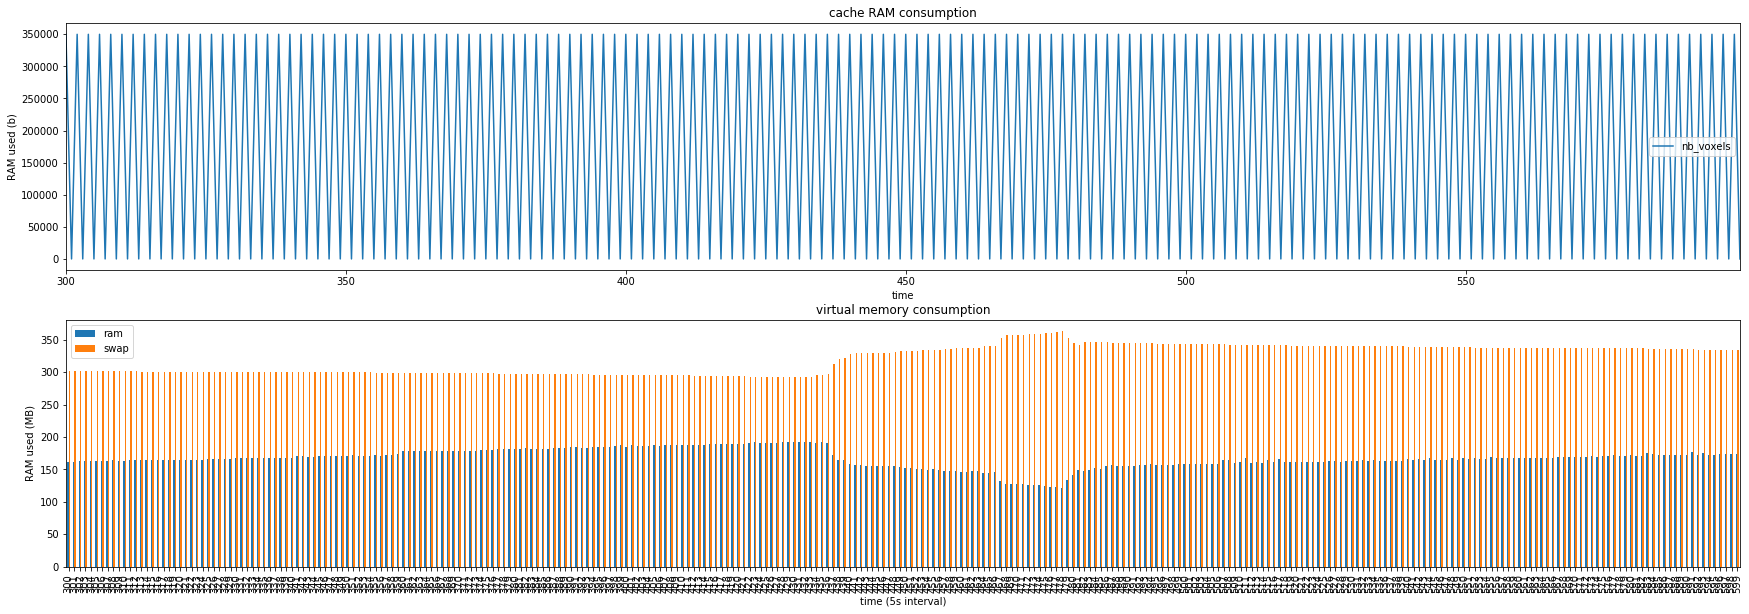

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30, 10), sharex=True)
plt.subplot(2,1,1)
vox_data[300:600].plot(title='cache RAM consumption', ax=plt.gca())
plt.gca().set(xlabel='time', ylabel='RAM used (b)')
mem_data[300:600].plot(title='virtual memory consumption', ax=axes[1], kind='bar')
axes[1].set(xlabel='time (5s interval)', ylabel='RAM used (MB)')